In [1]:
from PIL import Image
from IPython.display import display
import pytesseract
from pdf2image import convert_from_path, convert_from_bytes
import cv2
from matplotlib import pyplot as plt
import pandas as pd

In [12]:
# pytesseract.image_to_string(Image.open('shonbs.png'))
# pytesseract.image_to_boxes(Image.open('shonbs.png'))
# pytesseract.image_to_data(Image.open('shonbs.png'))

In [13]:
# images = convert_from_path('knbs.pdf')

In [14]:
# for i, index in images:
#     i.save(f'/pdf/{index}.png')
# for i in images:
#     display(i)

In [3]:
pdf = convert_from_path('./data/DODF.pdf')

In [4]:
# salva as páginas do pdf entre o intervalo first-last
def save_pdf_pages(first, last):
    for i in range(first, last+1):
        pdf[i-1].save(f'./data/dodf_pag{i}.png')

save_pdf_pages(5, 15)

In [5]:
# img = cv2.imread('../shonbs.png')

# lê os pdf convertidos em png pela função anterior,
#  entre o intervalo first-last, e retorna um array
#  de imagens
def read_images(first, last):
    images = []

    for i in range(first, last+1):
        images.append(cv2.imread(f'./data/dodf_pag{i}.png'))
    
    return images

images = read_images(5, 15)

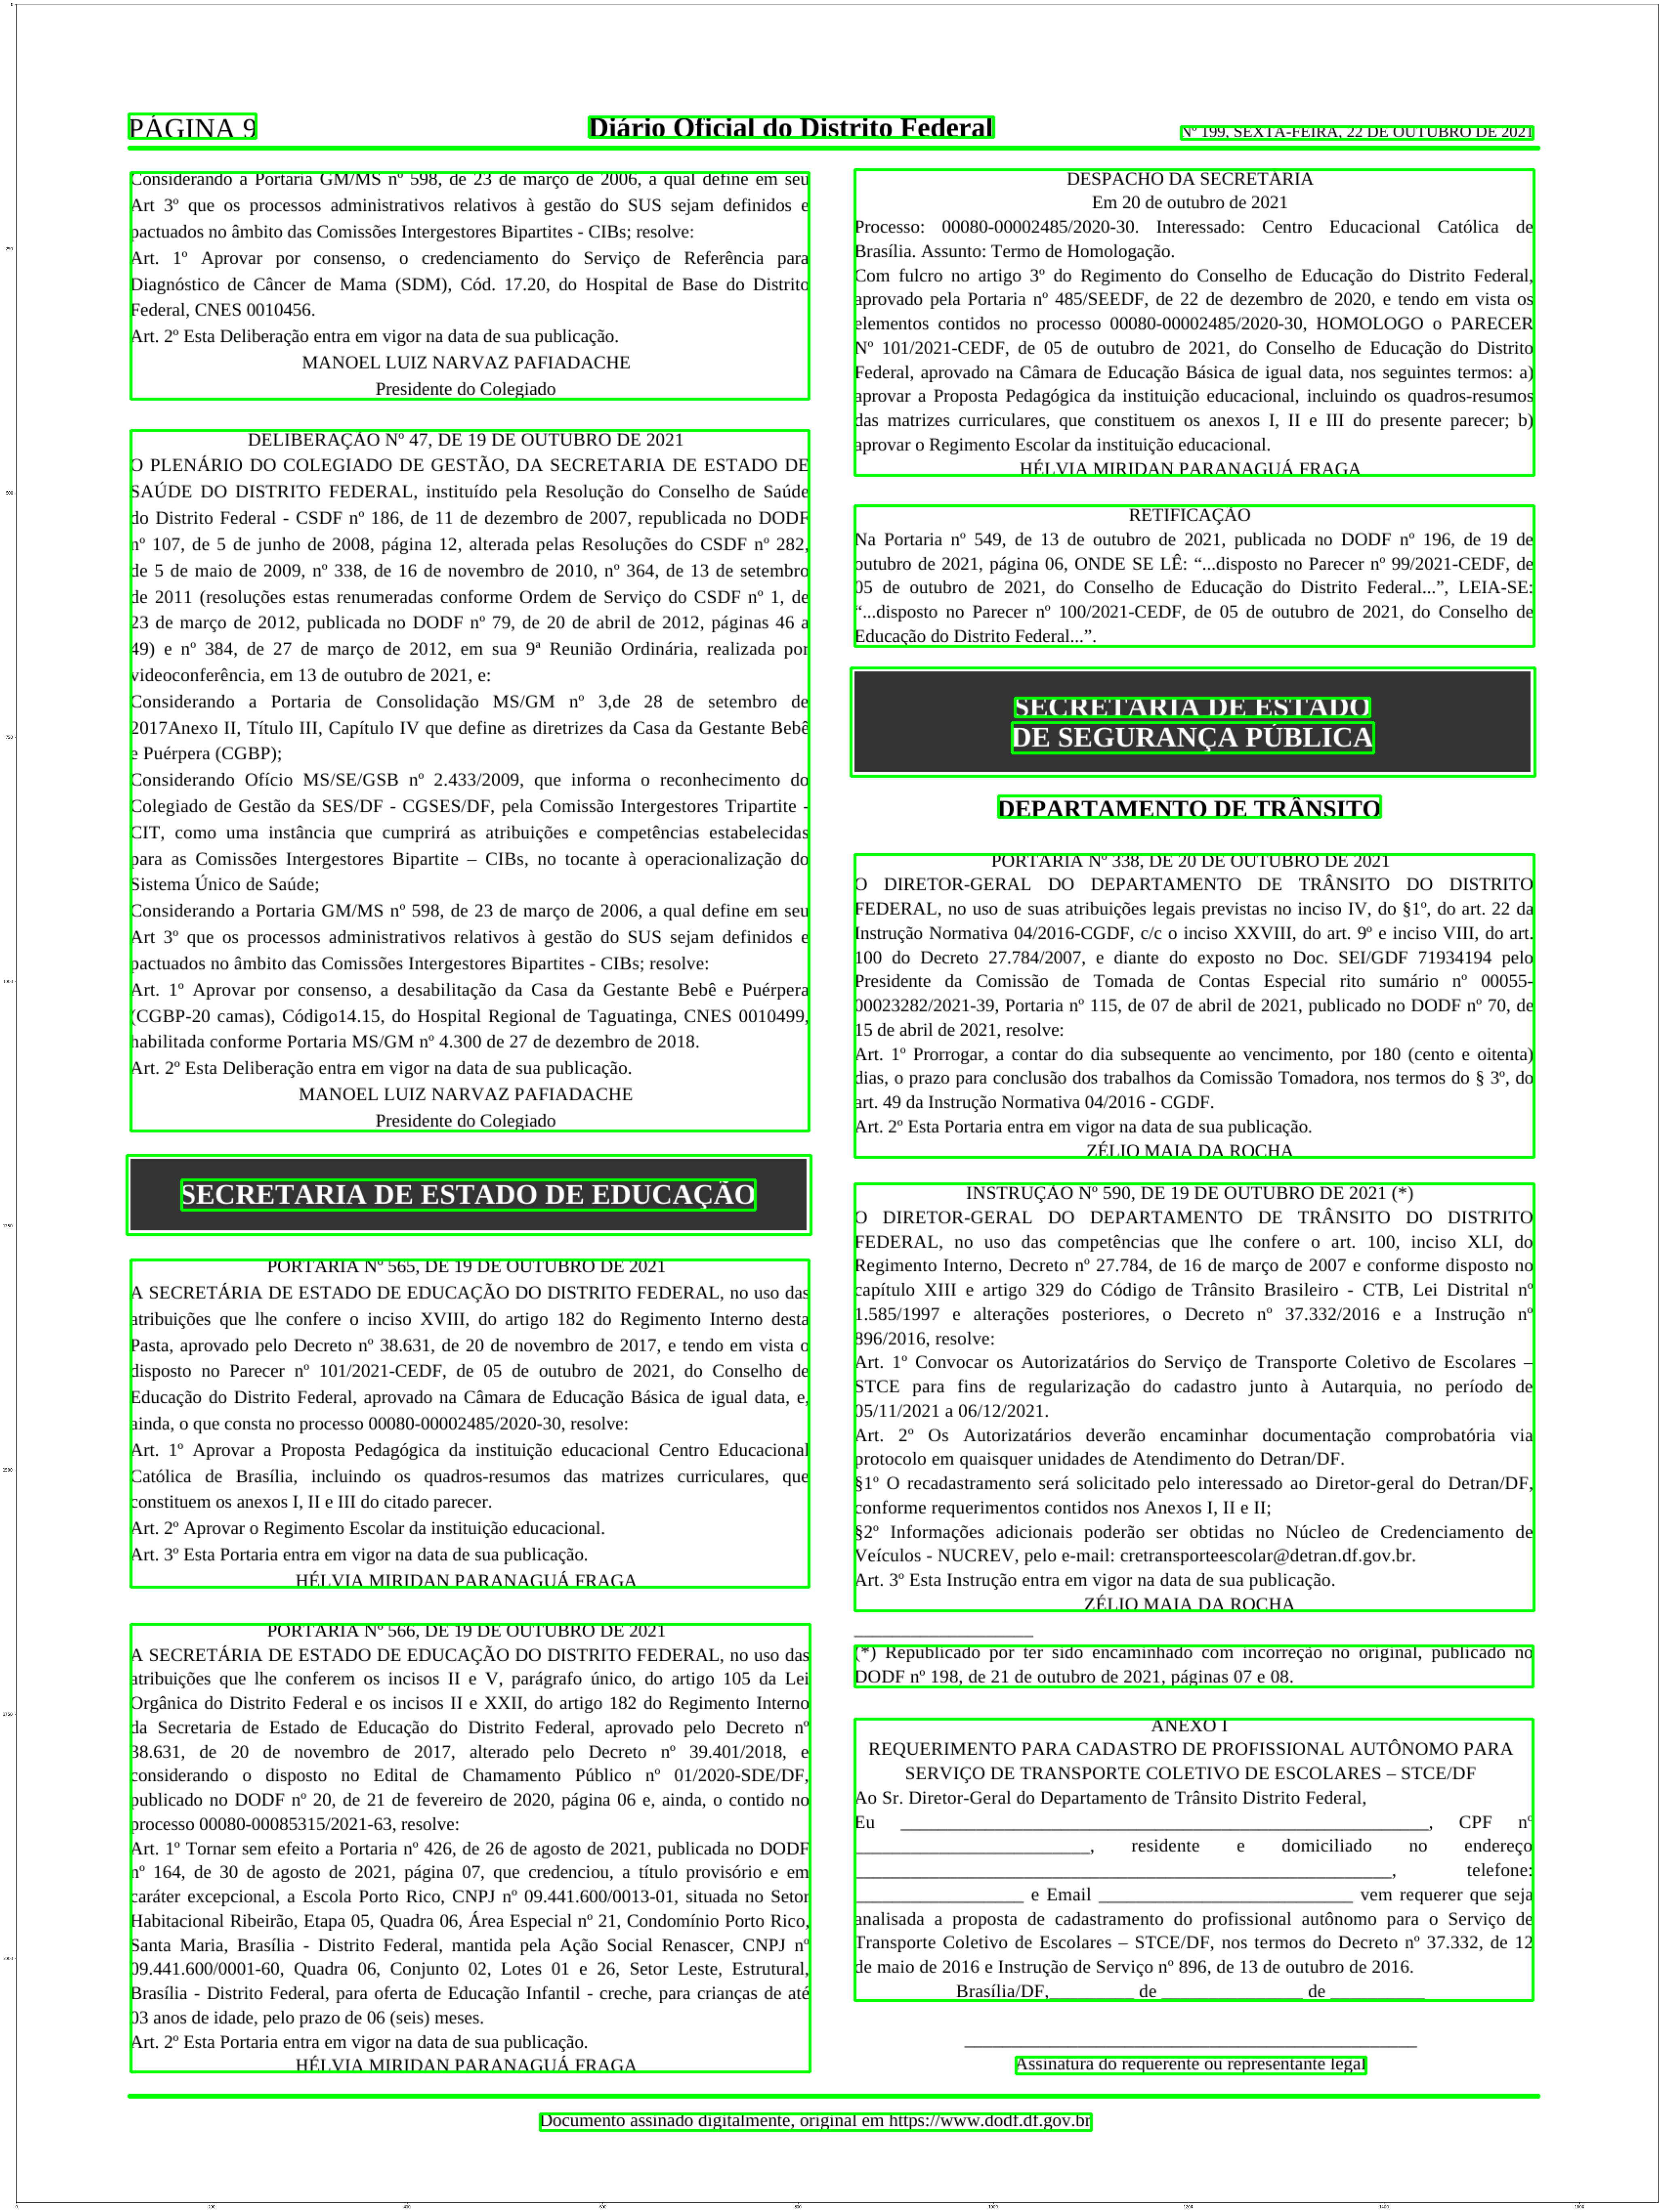

In [12]:
# desenha os blocos na imagem fornecida,
#  idealmente o array anterior será iterado
#  e a função abaixo será aplicada em cada item.
#  Retorna as coordenadas dos blocos
def draw_boxes_on_page(img, showImage=True):
    d = pytesseract.image_to_data(img, output_type=pytesseract.Output.DICT)
    n_boxes = len(d['level'])
    covered_areas = []
    for i in range(n_boxes):
        if d['level'][i] == 2:

            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])

            already_covered = 0
            for x_, y_, w_, h_ in covered_areas:
                if x_ <= x and y_ <= y_ and y_ + h_ >= y + h and x + w < x_ +  w_:
                    already_covered = 1
                    break
            if not already_covered:
                cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
                covered_areas.append((x,y,w,h))

    if showImage:
        fig, ax = plt.subplots(figsize=(100, 100))
        plt.imshow(img)
        plt.show()

    return covered_areas

imageIndex = 4
covered_areas = draw_boxes_on_page(images[imageIndex])

In [8]:
# Retorna a imagem de um bloco na de indice
#  'blockIndex' na página 'image'
def get_crop_block_image(image, blockIndex):
    x, y, w, h = covered_areas[blockIndex]
    x, y, w, h

    crop = image[y:y+h, x:x+w]
    return crop

# demonstração
# cropped = get_crop_block_image(images[0], 3)

# cv2.imshow('cropped', cropped)
# cv2.waitKey(0)
# cv2.destroyWindow("cropped")

In [13]:
# Salva os blocos de uma página 'image',
#  começando pelo indice 0 por padrão
def save_train_images(image, startingIndex=0):
    suffix = './data/block_'

    for i, _ in enumerate(covered_areas):
        cropped_image = get_crop_block_image(image, i)
        cv2.imwrite(f'{suffix}{i+startingIndex}.png', cropped_image)

save_train_images(images[imageIndex], startingIndex=83)

In [16]:
df = pd.read_csv('./train.csv')
df.iloc[:,:]

file_name         labels
0     block_0    xxpageIndex
1     block_1       xxheader
2     block_2         xxdate
3     block_4       xxtitle2
4     block_6       xxtitle3
..        ...            ...
59  block_100         xxtext
60  block_101  xxdescription
61  block_102         xxtext
62  block_103  xxdescription
63  block_105  xxdescription

[64 rows x 2 columns]